# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [2]:
import sqlite3

In [3]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [4]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
FriendWith:
  0: user_from()
  1: user_to()
  2: since(DATE)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Post:
  0: id(INTEGER) *1
  1: date(DATE)
  2: text(TEXT)
  3: attachement(TEXT)
  4: likes(INTEGER)
  5: user_id(INTEGER)
  6: parent_id(INTEGER)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
User:
  0: id(INTEGER) *1
  1: nickname(TEXT) not null
  2: name(TEXT)
  3: email(TEXT)
  4: birth_date(DATE)
  5: street(TEXT)
  6: zipcode(TEXT)
  7: state(TEXT)
  8: country(TEXT)
client:
  0: NB(NUM) *1
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
producteur:
  0: NP(NUM) *1
  1: NOM(TEXT)

Again, we will use **`%%sql`** magic for our queries

In [5]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [6]:
# create wine table

%sql DROP TABLE IF EXISTS vin;
%sql DROP TABLE IF EXISTS producteur;
%sql DROP TABLE IF EXISTS production;

%sql CREATE TABLE vin (NV NUM PRIMARY KEY, CRU TEXT, DEGRE NUM, MILL TEXT);
%sql INSERT INTO vin  SELECT DISTINCT NV, CRU, DEGRE, MILL FROM MASTER1 WHERE NV IS NOT NULL;


%sql CREATE TABLE producteur (NP NUM PRIMARY KEY, NOM TEXT, PRENOM TEXT, REGION TEXT);
%sql INSERT INTO producteur SELECT DISTINCT NP, NOM, PRENOM, REGION FROM MASTER1 WHERE NP IS NOT NULL;  


%sql CREATE TABLE production (NV NUM , NP NUM, QTE NUM, PRIMARY KEY (NV,NP), FOREIGN KEY(NV) REFERENCES vin(NV), FOREIGN KEY(NP) REFERENCES producteur(NP));
%sql INSERT INTO production SELECT NV, NP, QTE FROM MASTER1 WHERE QTE IS NOT NULL AND NV IS NOT NULL AND NP IS NOT NULL;  

# On vire manu - military les valeurs null dans la table. On perd betement de l'information... SQLite accepte d'avoir NP en valeur nulle pour une clé primaire
# mais cela n'est pas dans la norme SQL.

%sql DROP TABLE IF EXISTS client;
%sql DROP TABLE IF EXISTS vente;
%sql DROP TABLE IF EXISTS region;


%sql CREATE TABLE client (NB NUM, NOM TEXT, PRENOM TEXT, TYPE TEXT, PRIMARY KEY(NB));
%sql INSERT INTO client SELECT DISTINCT NB, NOM, PRENOM, TYPE FROM MASTER2 WHERE NB IS NOT NULL;

%sql CREATE TABLE vente (NV NUM, NB NUM, DATES TEXT, LIEU TEXT, QTE NUM, PRIMARY KEY(NV, NB, DATES, LIEU), FOREIGN KEY(NB) REFERENCES client(NB), FOREIGN KEY(NV) REFERENCES vin(NV));
%sql INSERT INTO  vente SELECT NV, NB, DATES, LIEU, QTE FROM MASTER2 WHERE NV IS NOT NULL AND NB IS NOT NULL AND DATES IS NOT NULL AND LIEU IS NOT NULL;

%sql CREATE TABLE region (LIEU TEXT, REGION TEXT); 
# LIEU IS NOT A FOREIGN KEY IN ORDER TO HAVE A STORE OF PLACE/REGION NOT DEPENDING OF THE USE
%sql INSERT INTO region SELECT DISTINCT LIEU, REGION FROM MASTER2 WHERE LIEU IS NOT NULL;


 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
102 rows affected.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
124 rows affected.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
138 rows affected.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
100 rows affected.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
73 rows affected.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
18 rows affected.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [7]:
%sql DROP VIEW IF EXISTS bons_buveurs;
%sql CREATE VIEW bons_buveurs AS SELECT * FROM client WHERE TYPE='gros' OR TYPE='moyen';

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [8]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [9]:
%sql DROP VIEW buveurs_asec
%sql CREATE VIEW buveurs_asec AS SELECT client.NB, NOM, PRENOM, TYPE FROM client LEFT JOIN vente ON vente.NB = client.NB WHERE NV IS NULL;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [10]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [11]:
%sql DROP VIEW buveurs_achats
%sql CREATE VIEW buveurs_achats AS SELECT * FROM client WHERE NB NOT IN (SELECT NB FROM buveurs_asec)

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [12]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [13]:
%sql DROP VIEW q83pl
%sql CREATE VIEW q83pl AS SELECT LIEU, CRU, SUM(QTE) as QTE_BUE FROM vente  JOIN vin ON vin.NV = vente.NV WHERE DATES LIKE '1983%' GROUP BY CRU, LIEU ORDER BY QTE_BUE ASC

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [14]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1
LYON,Julienas,2
PARIS,Pouilly Vinzelles,3
CAEN,Seyssel,3
PARIS,Beaujolais Primeur,4
LILLE,Pommard,5
LYON,Beaujolais Villages,10
ROCQUENCOURT,Saint Amour,80
ROCQUENCOURT,Beaujolais Villages,260


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [15]:
%sql DROP TABLE RBB
%sql CREATE TABLE RBB AS SELECT * FROM bons_buveurs; 

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [16]:
# Test
%sql SELECT * FROM RBB ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [17]:
%sql SELECT client.NB, NOM, PRENOM, TYPE, SUM(vente.QTE) as Total FROM client JOIN vente ON client.NB = vente.NB WHERE TYPE<>"gros" GROUP BY vente.NB HAVING SUM(vente.QTE) > 100;


 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,Total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [172]:
%sql UPDATE client SET TYPE='gros' WHERE NB IN (SELECT NB FROM vente GROUP BY NB HAVING SUM(QTE) > 100);


 * sqlite:///wine.db
5 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [20]:
%sql SELECT * FROM bons_buveurs JOIN RBB ON bons_buveurs.NB = RBB.NB WHERE bons_buveurs.TYPE!=RBB.TYPE ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,NB_1,NOM_1,PRENOM_1,TYPE_1
2,Artaud,Antonin,gros,2,Artaud,Antonin,moyen


In [21]:
%sql SELECT COUNT(NB) FROM RBB;

 * sqlite:///wine.db
Done.


COUNT(NB)
56


In [22]:
%sql SELECT COUNT(NB) FROM bons_buveurs;

 * sqlite:///wine.db
Done.


COUNT(NB)
59


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [23]:
%sql DROP TABLE RBA;
%sql CREATE TABLE RBA AS SELECT * FROM buveurs_asec;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [24]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [25]:
%sql INSERT INTO RBA VALUES (101, 'Martinez', 'Vincent', 'petit')

 * sqlite:///wine.db
1 rows affected.


[]

In [26]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [27]:
%sql SELECT * FROM buveurs_asec WHERE NB=101

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

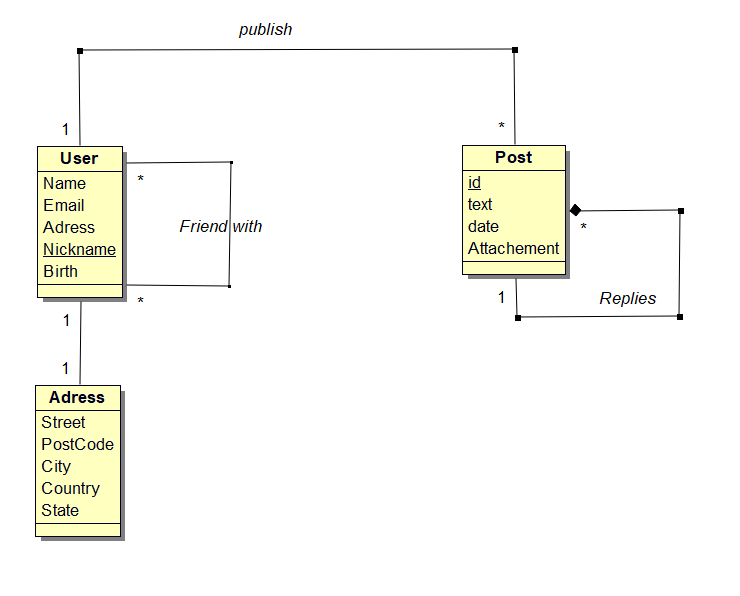

J'ai choisi de faire 3 entités et des relations les reliant.
L'entité principale sera "User". Il sera relié a d'autres entités User via une relation n-n "FriendWith". C'est une relation uni-directionnelle (on peut etre ami de quelqu'un qui n'est pas ami avec nous). Cette relation se traduira par une table de jointures entre les 2 entités (user_from, user_to). La clé de la table User pourrait etre le nickname ou un id généré.
Un User possède une adresse. Pour des raisons de lecture, l'adresse est dans une entité à part.
Suivant les performances attendues et le niveau de normalisation des données souhaitées, cette entité peut etre soit remise dans la table User ou dans une table séparée (2 users à la meme adresse par ex.). Dans mon cas, j'aurais préféré une approche dénormalisée pour cette entité afin de garder en performance et éviter une jointure avec une table qui fera quasiment la taille de la table User.
Un Post est constitué d'un id (pour identification), un text, un attachement (TEXT, un lien vers une image? video externe) et une date. Un post a une relation avec User (un post est effectué par un utilisateur). C'est une relation 1-n. Dans ce cas, nous ajouterons l'ID de l'utilisateur commme colonne de la table Post.
Un Post peut avoir des reponses. Une reponse est un Post avec une relation de composition avec un autre post. Cette relation est symbolisé par la relation "Replies" sur le schéma. C'est aussi une relation 1-n (un post n'est un reply que d'un autre post, et un post peut avoir plusieurs replies). Pour les posts originaux, cette colonne sera donc vide.



Une proposition de schema SQL:

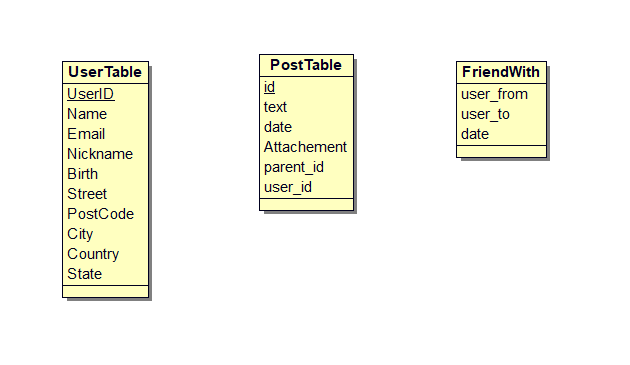


In [127]:
%%sql
DROP TABLE IF EXISTS  User;
DROP TABLE IF EXISTS Post ;
DROP TABLE IF EXISTS FriendWith;

CREATE TABLE User (id INTEGER PRIMARY KEY AUTOINCREMENT, nickname TEXT NOT NULL, name TEXT, email TEXT, birth_date DATE, street TEXT, zipcode TEXT, state TEXT, country TEXT);
CREATE TABLE Post (id INTEGER PRIMARY KEY AUTOINCREMENT, date DATE, text TEXT, attachement TEXT, user_id INTEGER, parent_id INTEGER);
CREATE TABLE FriendWith(user_from, user_to, since DATE);

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

Pour afficher lors du login les posts de nos amis (posts originaux uniquement, sans parent), en considerant mon identifiant comme valant '12' nous utiliserons la requete suivante: 

In [129]:
%sql SELECT * FROM Post WHERE parent_id IS NULL AND user_id IN (SELECT user_to FROM FriendWith WHERE user_from=12);

 * sqlite:///wine.db
Done.


id,date,text,attachement,user_id,parent_id


#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

On pourrait soit considérer les posts avec le plus de reponses (directes ou non), soit ajouté un champ "likes" qui pourrait compter le nombre d'apréciations d'un post. 

Pour avoir les posts originaux avec le plus reponses directe, nous allons faire cette requete:

In [147]:
%%sql
DROP VIEW mostRepliedPost;
CREATE VIEW mostRepliedPost AS SELECT Post.id, COUNT(p2.id) as MostReplies FROM Post 
        JOIN Post as p2 ON Post.id = p2.parent_id 
        WHERE Post.parent_id IS NULL AND Post.user_id IN (SELECT user_to FROM FriendWith WHERE user_from=12) ORDER BY COUNT(p2.id) DESC LIMIT(10);

 * sqlite:///wine.db
Done.
Done.


[]

In [148]:
%sql SELECT * FROM mostRepliedPost;

 * sqlite:///wine.db
Done.


id,MostReplies
None,0


Pour avoir les posts originaux avec le plus de replies, il faudrait faire une requette recursive sur les posts.



Dans le second cas, on ajoute simplement une colonne likes dans la table Posts. Dans ce cas, voici le code associé, avec les 10 posts les plus "likés"

In [20]:
%%sql
DROP TABLE IF EXISTS Post ;

CREATE TABLE Post (id INTEGER PRIMARY KEY AUTOINCREMENT, date DATE, text TEXT, attachement TEXT, likes INTEGER, user_id INTEGER, parent_id INTEGER);

DROP VIEW mostLikedPost ;

CREATE VIEW mostLikedPost AS SELECT * FROM Post WHERE parent_id IS NULL AND user_id IN (SELECT user_to FROM FriendWith WHERE user_from=12) ORDER BY likes LIMIT(10);


 * sqlite:///wine.db
Done.
Done.
Done.
Done.


[]

Pour améliorations, nous pourrions aussi avoir plusieurs informations supplémentaires:
     - une table pour garder qui a like quoi au lieu d'un champ dans la table posts. Elle pourrait avoir une relation 1-n avec la table user
     - une information pour savoir qui a regardé quoi. Cela sera une relation n*n entre user et post. On aura donc une nouvelle table pour une liaison entre les 2 entités.